In [11]:
# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    USING_COLAB = True
except:
    USING_COLAB = False

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
# !pip install nlpaug

In [14]:
if USING_COLAB:
    path_dataset = "/content/drive/My Drive/GTSI/Codigos_proyectos_carrera/data"
    sufix = "colab"
else:
    path_dataset = "./data"
    sufix = "colab"

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
df = pd.read_csv(path_dataset + "/projects_augmented_" + sufix + ".csv")

C:\Users\saraujo\AppData\Local\Temp\ipykernel_39628\2602201521.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_dataset + "/projects_augmented_" + sufix + ".csv")


In [17]:
df.shape

(409422, 8)

In [18]:
df.head()

,titulo,FACULTAD,CARRERA,NOMBREPROYEC,counts,URL,gpu_used,batch_id
0,preparación de nano celulosa y su utilización ...,Facultad de Ciencias Naturales y Matemáticas,Ingeniería Química,Preparación de nano celulosa y su utilización ...,72.0,0,NaN,NaN
1,monitoreo no intrusivo de cargas eléctricas en...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,71.0,0,NaN,NaN
2,difusión del uso de herramientas tecnológicas ...,"Facultad de Arte, Diseño y Comunicación Audiov...",Diseño Gráfico,Difusión del uso de herramientas tecnológicas ...,62.0,0,NaN,NaN
3,plan de negocios para la venta de snacks salud...,Facultad de Ciencias Sociales y Humanísticas,Ingeniería en Negocios Internacionales,PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...,56.0,0,NaN,NaN
4,variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,Variacion del tiempo de fraguado debido a mixt...,56.0,0,NaN,NaN


In [19]:
df["titulo"].nunique(), df["NOMBREPROYEC"].nunique(), df["FACULTAD"].nunique(), df["CARRERA"].nunique()

(398292, 18672, 10, 78)

In [21]:
df_carrera_count_all = df["CARRERA"].value_counts()
value_counts = 10
df_carrera_count = df_carrera_count_all[df_carrera_count_all >= value_counts]
df_carrera_count_less = df_carrera_count_all[df_carrera_count_all < value_counts]
df_carrera_count_all

CARRERA
Economía                                                             6523
Electricidad                                                         6371
Ingeniería Industrial                                                6018
Telecomunicaciones                                                   5979
Ingeniería Comercial                                                 5836
                                                                     ... 
Ingeniería en Auditoría y Control de Gestión. Calidad de Procesos    5005
Diplomado en Evaluación y Dirección de Proyectos de Inversión        5005
Ciencias Biológicas                                                  5003
Licenciatura en Sistema de Información (EDCOM)                       5001
Programador de Sistemas                                              5001
Name: count, Length: 78, dtype: int64

In [22]:
df_carrera_count_all.shape, df_carrera_count.shape, df_carrera_count_less.shape

((78,), (78,), (0,))

In [23]:
df_carrera_count_less

Series([], Name: count, dtype: int64)

In [24]:
df_carrera_count

CARRERA
Economía                                                             6523
Electricidad                                                         6371
Ingeniería Industrial                                                6018
Telecomunicaciones                                                   5979
Ingeniería Comercial                                                 5836
                                                                     ... 
Ingeniería en Auditoría y Control de Gestión. Calidad de Procesos    5005
Diplomado en Evaluación y Dirección de Proyectos de Inversión        5005
Ciencias Biológicas                                                  5003
Licenciatura en Sistema de Información (EDCOM)                       5001
Programador de Sistemas                                              5001
Name: count, Length: 78, dtype: int64

In [25]:
df_new = df[df["CARRERA"].isin(df_carrera_count.index)]
df_new.shape

(409422, 8)

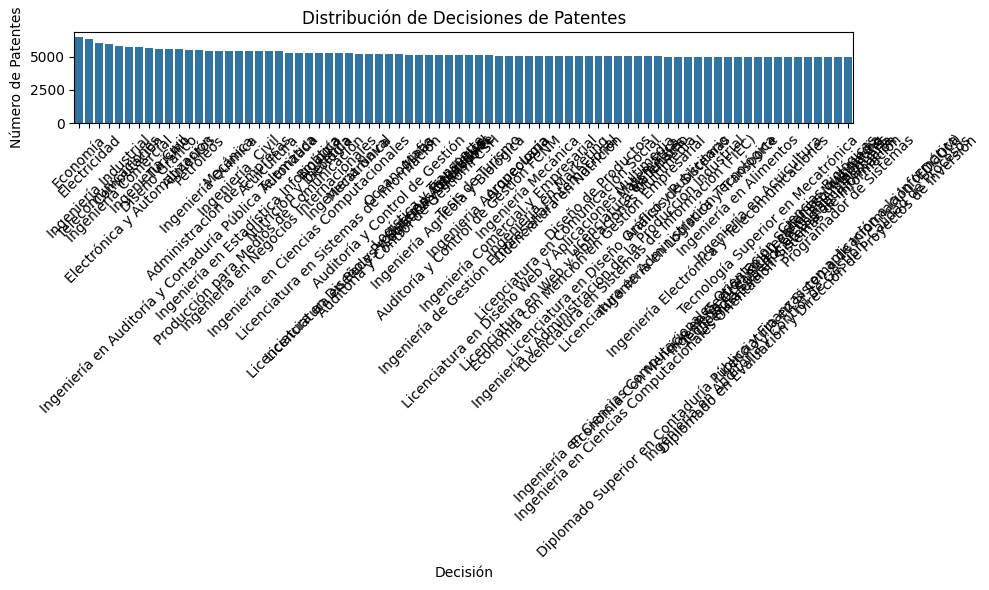

In [26]:
# diagrama de barras de la columna "decision"
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='CARRERA', order=df_new['CARRERA'].value_counts().index)
plt.title('Distribución de Decisiones de Patentes')
plt.xlabel('Decisión')
plt.ylabel('Número de Patentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()